In [ ]:
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 37.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13707 sha256=baed964a4f0858148847b13582d11abdcc5e5a555a7ca9cbd316e4f8225c0a86
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import pandas as pd
import pymorphy2

import matplotlib.pyplot as plt

In [ ]:
resumes = pd.read_csv('/content/df_resume.csv')

In [ ]:
resumes['tokens'] = resumes['resume'].str.lower().str.split()
tokens = resumes['tokens'].tolist()

In [ ]:
corpus_tokens = []

for i in tokens:
    corpus_tokens.extend(i)

In [ ]:
# Number of tokens
len(corpus_tokens)

161043

In [ ]:
# Number of unique tokens
len(set(corpus_tokens))

15943

In [ ]:
morph = pymorphy2.MorphAnalyzer()
vocabulary_corpus = dict()

for token in corpus_tokens:
    if token.isalpha():
        tokens_normal_form = morph.parse(token)[0].normal_form
        if tokens_normal_form in vocabulary_corpus:
            vocabulary_corpus[tokens_normal_form] += 1
        else:
            vocabulary_corpus[tokens_normal_form] = 1

In [ ]:
# Vocabulary size - number of unique token words reduced to normal form
len(vocabulary_corpus)

7633

In [ ]:
vocabulary_corpus = dict(sorted(vocabulary_corpus.items(), 
                                key=lambda item: item[1],
                                reverse=True))

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stopwords_ru = stopwords.words("russian")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# adding to the list of stop words the words related to the resume metadata, and which are not characteristic

stopwords_ru.extend(['id', 'резюме', 'обновить'])

In [ ]:
characteristic_vocabulary_corpus = dict()

In [ ]:
for key, value in vocabulary_corpus.items():
    if key not in stopwords_ru:
        characteristic_vocabulary_corpus[key] = value

In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist(characteristic_vocabulary_corpus)

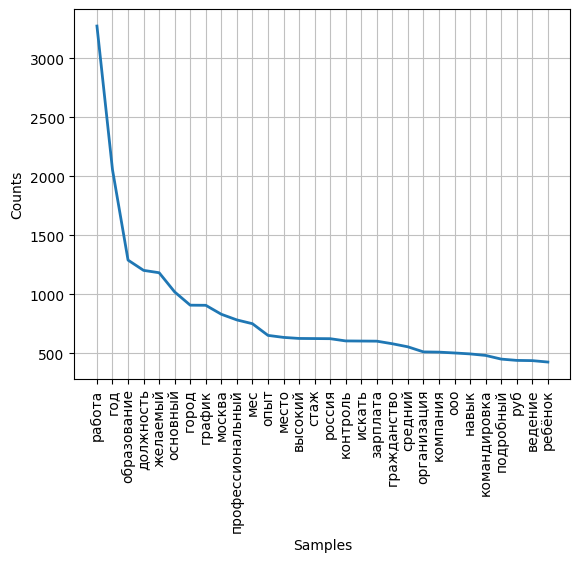

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
fdist.plot(30,cumulative=False)

In [ ]:
resumes_labeled = resumes[resumes['labels'].notna()]

resumes_labeled['tokens_labeled'] = resumes_labeled['labels'].str.split()
tags = resumes_labeled['tokens_labeled'].tolist()

<ipython-input-18-872c7412925d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resumes_labeled['tokens_labeled'] = resumes_labeled['labels'].str.split()


In [ ]:
corpus_tags = []

for i in tags:
    corpus_tags.extend(i)

In [ ]:
tags_dict = dict()

for tag in corpus_tags:
    tag_to_key = tag.split(sep='-')[-1]
    if tag_to_key in tags_dict:
        tags_dict[tag_to_key] += 1
    else:
        tags_dict[tag_to_key] = 1

In [ ]:
tags_dict.pop('O')

24180

In [ ]:
tags_dict

{'AGE': 198,
 'SEX': 100,
 'VAC': 250,
 'SAL': 365,
 'SCH': 370,
 'ADDR': 375,
 'EDU': 1846,
 'LEXP': 218,
 'LPST': 212,
 'LORG': 242}

In [ ]:
tags_dict_sum = sum(tags_dict.values())

In [ ]:
for key, value in tags_dict.items():
    tags_dict[key] = value/tags_dict_sum

<BarContainer object of 10 artists>

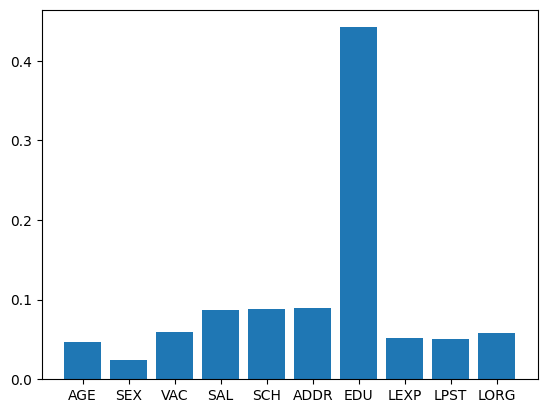

In [ ]:
plt.bar(list(tags_dict.keys()), tags_dict.values())

In [ ]:
tags_dict

{'AGE': 0.04741379310344827,
 'SEX': 0.023946360153256706,
 'VAC': 0.05986590038314176,
 'SAL': 0.08740421455938698,
 'SCH': 0.0886015325670498,
 'ADDR': 0.08979885057471264,
 'EDU': 0.4420498084291188,
 'LEXP': 0.05220306513409962,
 'LPST': 0.05076628352490421,
 'LORG': 0.05795019157088123}